In [1]:
# ============================================================================
# EJERCICIO PRÁCTICO: CLASIFICACIÓN DE FLORES IRIS CON SCIKIT-LEARN
# Este código muestra el flujo completo de un proyecto ML básico
# ============================================================================

# ---- 1. IMPORTACIÓN DE LIBRERÍAS ----
# NumPy: para operaciones numéricas y manejo de arrays
import numpy as np
# Matplotlib: para crear visualizaciones y gráficos
import matplotlib.pyplot as plt
# Importamos los módulos específicos de scikit-learn que necesitamos:
              # Contiene datasets de ejemplo
from sklearn import datasets
from sklearn.model_selection import train_test_split  # Para dividir los datos
from sklearn.preprocessing import StandardScaler      # Para normalizar datos
from sklearn.neighbors import KNeighborsClassifier    # Algoritmo KNN
from sklearn.metrics import accuracy_score, confusion_matrix  # Métricas de evaluación

In [2]:
# ---- 2. CARGA DE DATOS ----
# Cargamos el dataset Iris que viene incluido en scikit-learn
iris = datasets.load_iris()
# X contiene las características (features) - 4 medidas de la flor
X = iris.data    # Formato: [longitud_sépalo, ancho_sépalo, longitud_pétalo, ancho_pétalo]
# y contiene las etiquetas (labels) - 3 especies de flores
y = iris.target  # 0=Setosa, 1=Versicolor, 2=Virginica

In [3]:
# ---- 3. EXPLORACIÓN INICIAL DE DATOS ----
# Imprimimos información básica sobre nuestro dataset
print(X.shape) # Muestra (150, 4) - 150 muestras con 4 características
print(iris.feature_names)# Muestra los nombres de las columnas
print(iris.target_names)  # Muestra los nombres de las especies

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
# ---- 4. DIVISIÓN DE DATOS ----
# Dividimos los datos en conjunto de entrenamiento (70%) y prueba (30%)
# random_state=42 garantiza que siempre obtengamos la misma división (reproducibilidad)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Mostramos el tamaño de cada conjunto para verificar
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")  # Debe mostrar (105, 4)
print(f"Tamaño del conjunto de prueba: {X_test.shape}")          # Debe mostrar (45, 4)

Tamaño del conjunto de entrenamiento: (105, 4)
Tamaño del conjunto de prueba: (45, 4)


In [5]:
# ---- 5. PREPROCESAMIENTO: NORMALIZACIÓN ----
# Creamos un objeto scaler que calculará la media y desviación estándar
scaler = StandardScaler()
# Ajustamos el scaler con los datos de entrenamiento y transformamos esos datos
# fit_transform() hace dos cosas: calcula parámetros y aplica la transformación
X_train_scaled = scaler.fit_transform(X_train)
# Para los datos de prueba, solo aplicamos la transformación usando los parámetros ya calculados
X_test_scaled = scaler.transform(X_test)
# Nota: Es crucial usar los mismos parámetros de normalización en datos de prueba

In [6]:
# ---- 6. CREACIÓN Y ENTRENAMIENTO DEL MODELO ----
# Definimos el número de vecinos para el algoritmo KNN
       # Este es un hiperparámetro que podemos ajustar
knn = 5
# Creamos una instancia del clasificador KNN
modelo = KNeighborsClassifier(n_neighbors=knn)
# Entrenamos el modelo con los datos de entrenamiento
# fit() es el método que realiza el aprendizaje
modelo.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [7]:
# ---- 7. PREDICCIÓN ----
# Usamos el modelo entrenado para predecir las clases de los datos de prueba
y_pred = modelo.predict(X_test_scaled)
# y_pred ahora contiene las especies predichas para cada flor del conjunto de prueba

In [8]:
# ---- 8. EVALUACIÓN DEL MODELO ----
# Calculamos la precisión (accuracy): porcentaje de predicciones correctas
precision = accuracy_score(y_test, y_pred)
print(f'\nMatriz de confusion {precision:.2f}')
# Calculamos la matriz de confusión, que muestra predicciones correctas e incorrectas por clase
matriz_confusion = confusion_matrix(y_test, y_pred)
print(f'\nMatriz de confusion:')
print(matriz_confusion)

# Mostramos los resultados



# Cada fila representa la clase real y cada columna la clase predicha
# La diagonal principal muestra predicciones correctas


Matriz de confusion 1.00

Matriz de confusion:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [9]:
# ---- 9. VISUALIZACIÓN DE RESULTADOS ----
# Creamos una figura para nuestros gráficos
plt.figure(figsize=(10, 6))

# Seleccionamos solo las primeras dos características para poder graficar en 2D
# (no podemos visualizar fácilmente 4 dimensiones)
X_test_2d = X_test[:, :2] #Solo las primeras 2 características

# Creamos colores para las clases: azul=Setosa, rojo=Versicolor, verde=Virginica
# Esta línea asigna un color a cada etiqueta en y_test
y_test_colors = np.array(['blue', 'red', 'green'])[y_test]
# Hacemos lo mismo para las predicciones
y_pred_colors = np.array(['blue', 'red', 'green'])[y_pred]

<Figure size 1000x600 with 0 Axes>

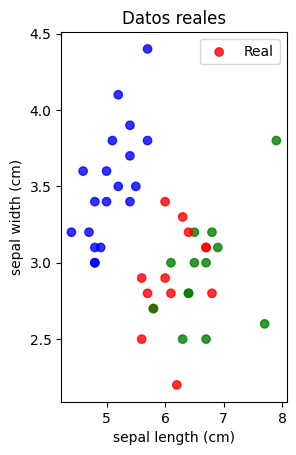

In [10]:
# PRIMER GRÁFICO: Datos reales
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
# Scatter plot donde cada punto es una flor, coloreada según su especie real
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test_colors, alpha=0.8, label='Real')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Datos reales')
plt.legend()

  # Nombre de la primera característica en el eje X
  # Nombre de la segunda característica en el eje Y

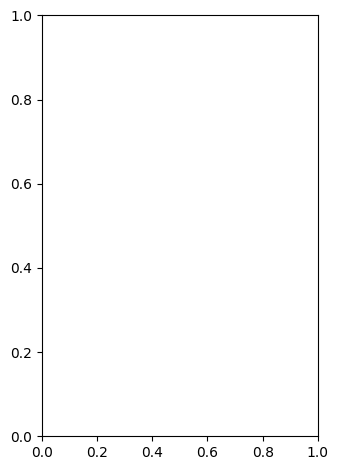

In [11]:
# SEGUNDO GRÁFICO: Predicciones del modelo
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
# Scatter plot donde cada punto es una flor, coloreada según la especie predicha




# Ajustamos el layout para que no se superpongan los gráficos
plt.tight_layout()
# Mostramos los gráficos


In [12]:
# ---- 10. PREDICCIÓN CON NUEVOS DATOS ----
# Simulamos tener una nueva flor con medidas específicas que queremos clasificar
# Formato: [longitud_sépalo, ancho_sépalo, longitud_pétalo, ancho_pétalo]
nueva_flor = np.array([[5.1, 3.5, 1.4, 0.2]])  # Medidas típicas de una Setosa

# Importante: debemos normalizar los nuevos datos usando el mismo scaler
nueva_flor_scaled = scaler.transform(nueva_flor)

# Hacemos la predicción con el modelo entrenado
prediccion = modelo.predict(nueva_flor_scaled)

# Mostramos el resultado usando el nombre de la especie, no solo el número
print(f"\nPredicción para la nueva flor: {iris.target_names[prediccion[0]]}")
# prediccion[0] contiene el índice (0, 1 o 2) que usamos para obtener el nombre


Predicción para la nueva flor: setosa
